### Problem Statement

In [1]:
# Create a classification model which can predict the passenger survival in Titanic Ship.

### Dataset Details

In [2]:
# The titanic.csv file provides information on 891 actual Titanic passengers.
# Each row represents a single individual. The columns explain various aspects of the person, such as whether they survived and
# their age, their passenger-class, their Gender and the fare they paid.

### Importing the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score

### Importing the Dataset

In [3]:
df=pd.read_csv(".\\Datasets\\titanic.csv")
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Exploratory Data Analysis

In [5]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Observations
# There are total 12 columns out of which 3 columns have some missing values and remaining columns have 891 values.
# Age, Cabin and Embarked are that 3 columns.

In [8]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<Axes: >

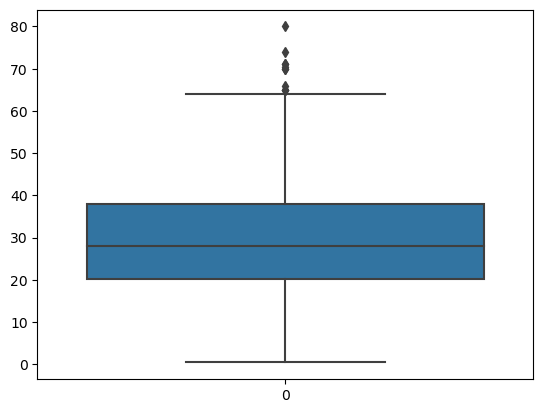

In [11]:
sns.boxplot(df['Age'])

In [10]:
df.head(10)

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,"Moran, Mr. James",3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",2,female,14.0,1,0,237736,30.0708,NaN,C,1


In [11]:
df['Embarked'].nunique()

3

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

[Text(0, 0, '577'), Text(0, 0, '314')]

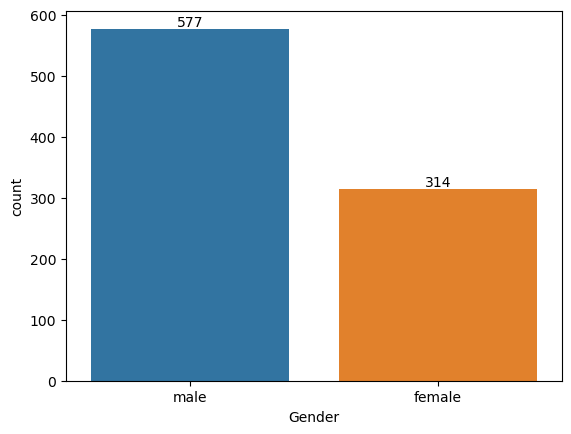

In [13]:
plot=sns.countplot(x=df['Gender'])
plot.bar_label(plot.containers[0])

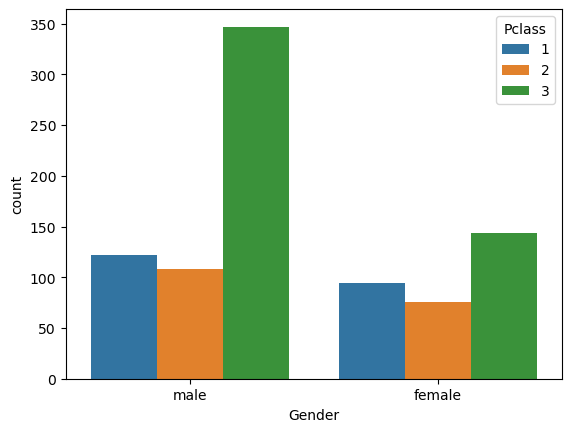

In [12]:
plot=sns.countplot(x=df['Gender'],hue=df['Pclass'])

[Text(0, 0, '441'), Text(0, 0, '95'), Text(0, 0, '41')]

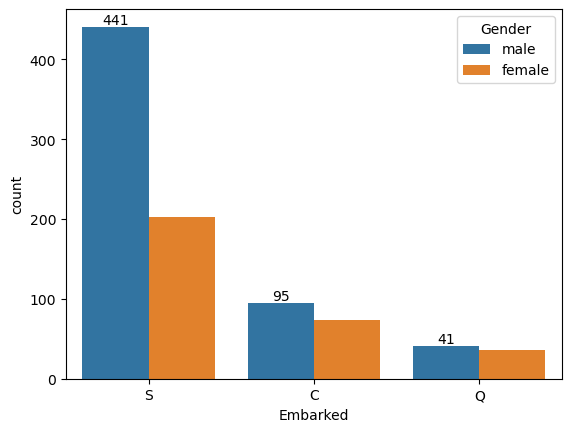

In [13]:
plot=sns.countplot(x=df['Embarked'],hue=df['Gender'])
plot.bar_label(plot.containers[0])

<Axes: xlabel='Age', ylabel='Count'>

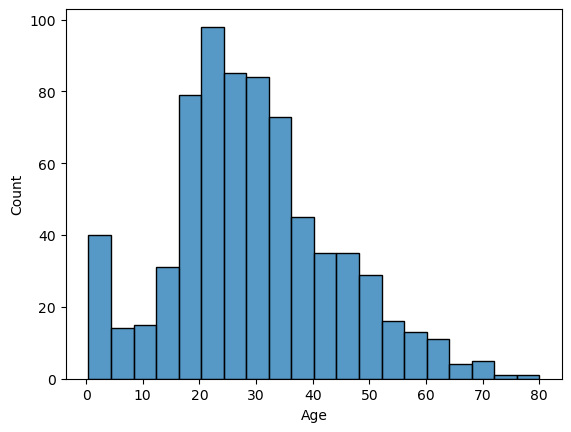

In [15]:
sns.histplot(x=df['Age'])

<Axes: xlabel='Pclass', ylabel='Survived'>

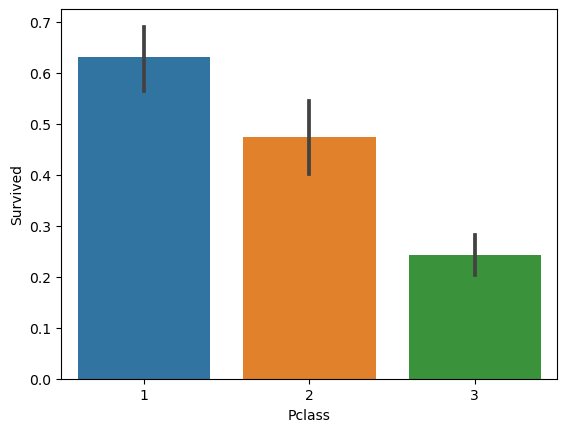

In [15]:
sns.barplot(x='Pclass',y='Survived',data=df)

<Axes: xlabel='Parch', ylabel='Survived'>

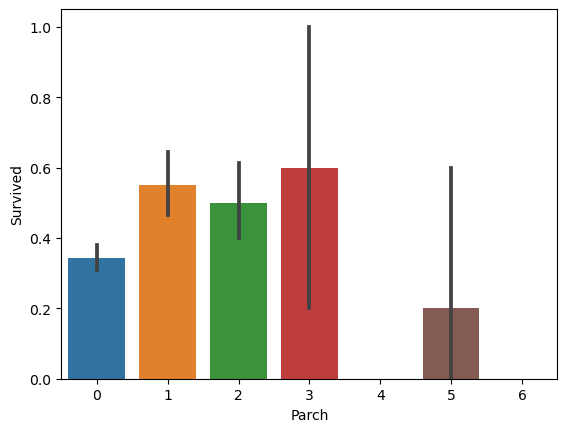

In [19]:
sns.barplot(x='Parch',y='Survived',data=df)

<Axes: xlabel='Age', ylabel='Fare'>

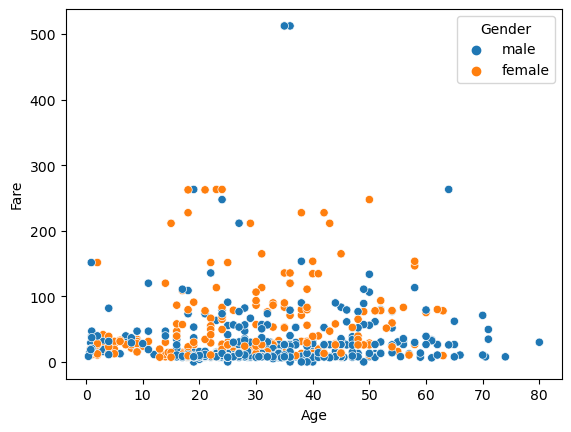

In [14]:
sns.scatterplot(x='Age',y='Fare',hue='Gender',data=df)

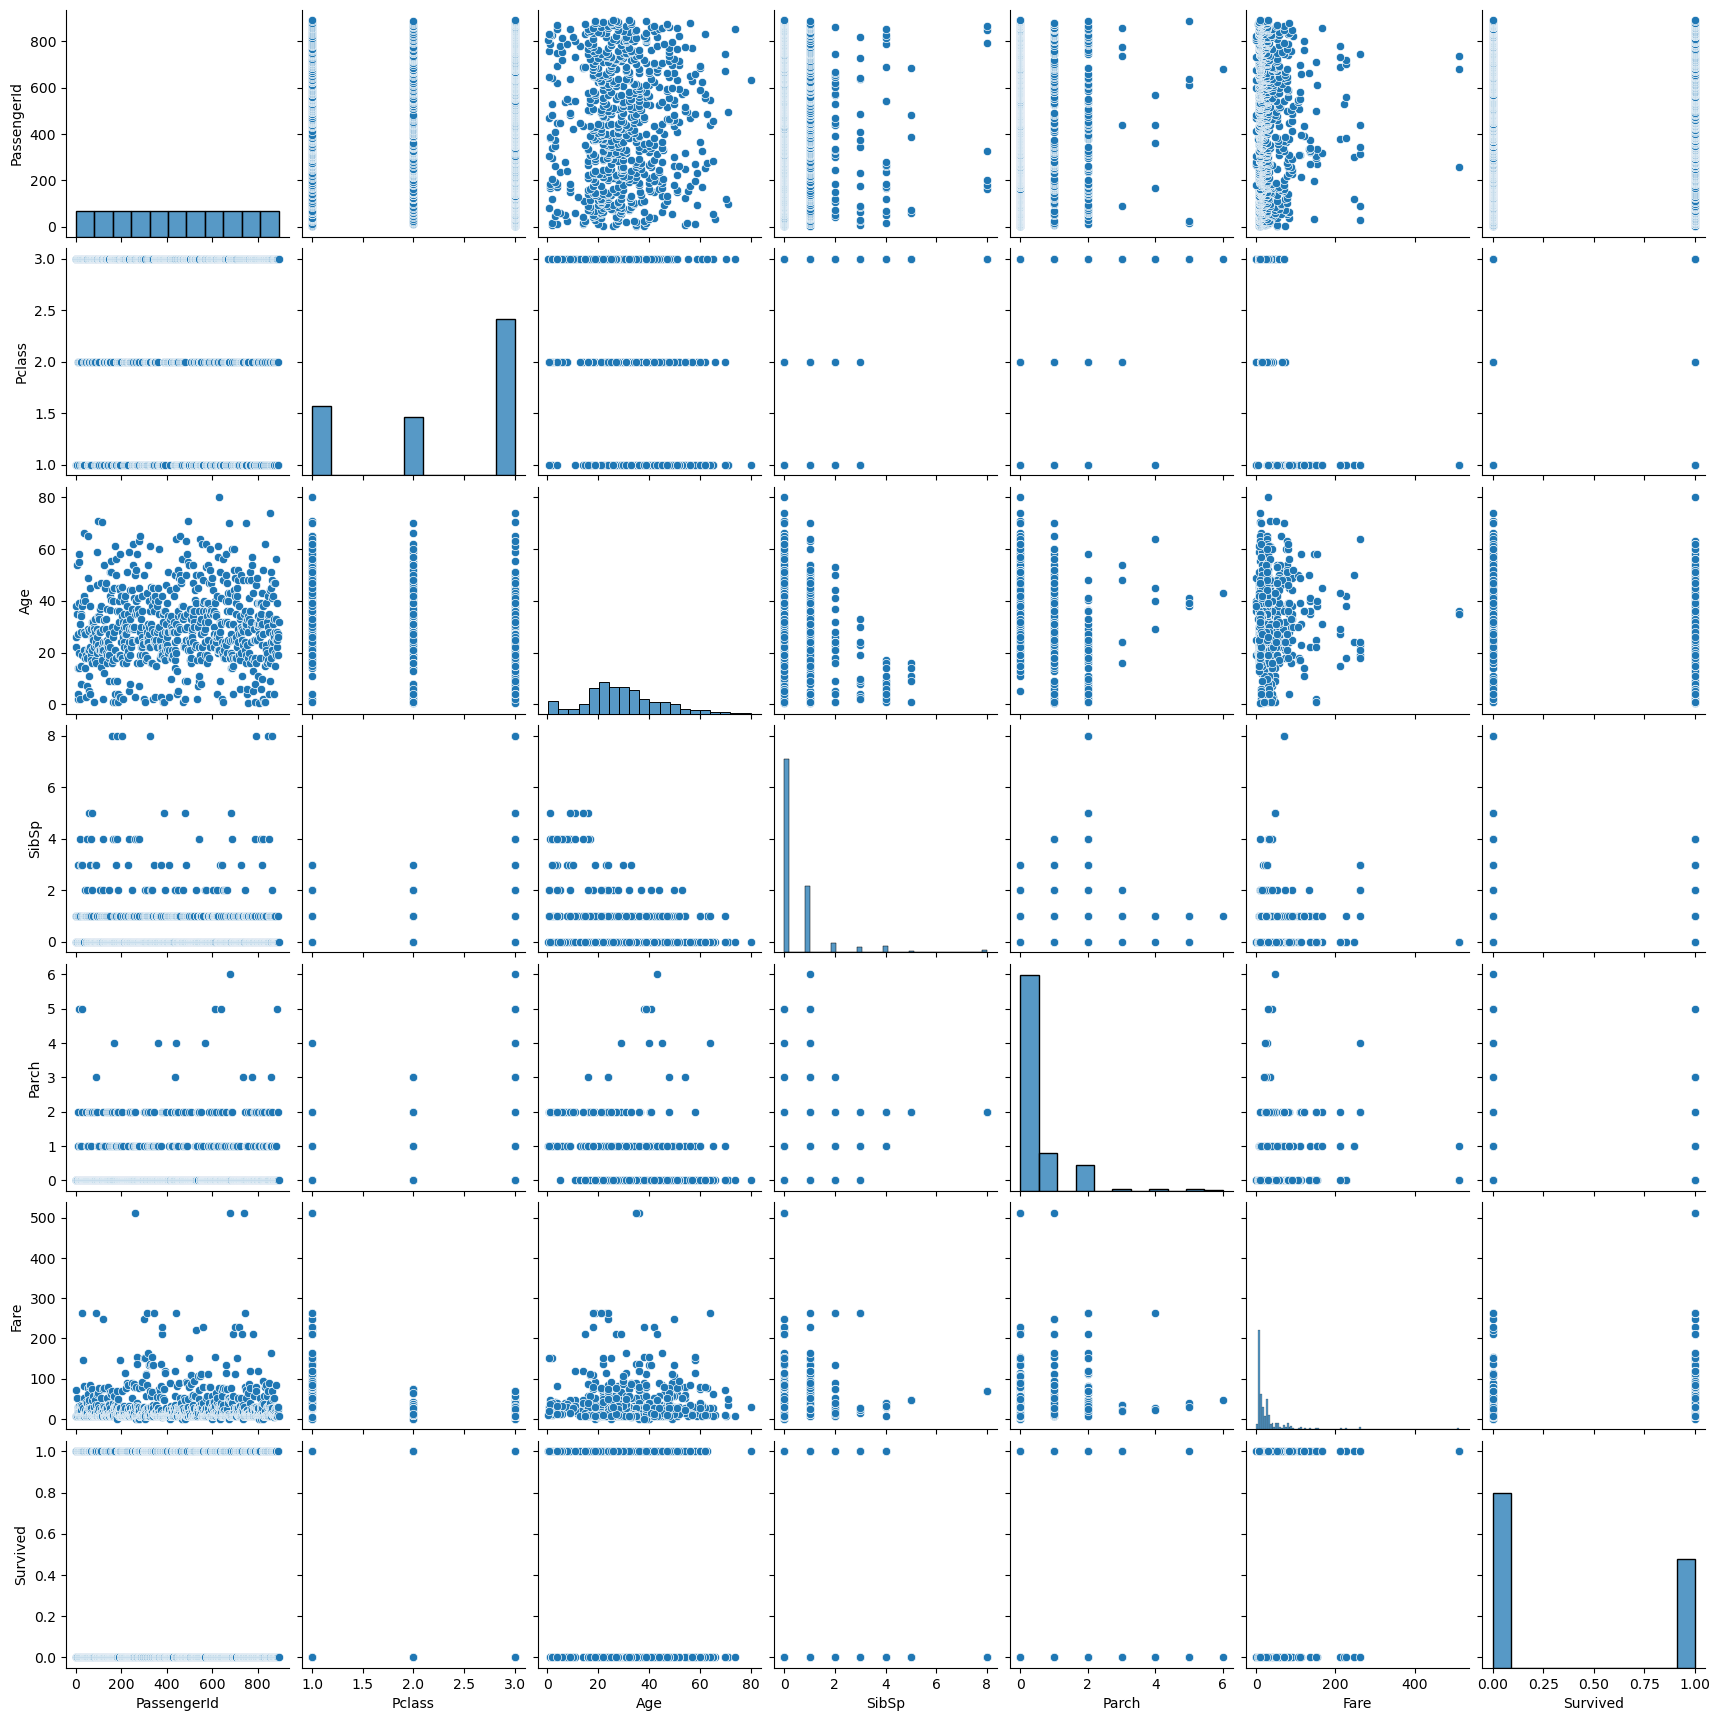

In [17]:
sns.pairplot(df)

<Axes: >

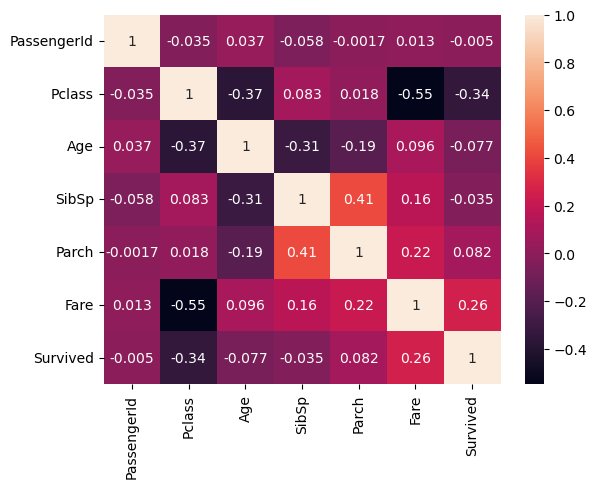

In [18]:
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

In [19]:
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

### Handling the Missing Values

In [21]:
df['Age'].mean()

29.69911764705882

In [22]:
# Handling the missing values of Age column
df['Age']=df['Age'].fillna(df['Age'].mean())

In [23]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [24]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [25]:
# Handling the missing values of Embarked column
df['Embarked']=df['Embarked'].fillna('S')

In [26]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

### Converting categorical data into a numerical form

In [27]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [28]:
# Applying one hot encoding on 'Gender' column
encoded_gender=pd.get_dummies(df['Gender'])
encoded_gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
df=pd.concat([df,encoded_gender],axis=1)
df

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male
0,1,"Braund, Mr. Owen Harris",3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,"Heikkinen, Miss. Laina",3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.000000,1,0,113803,53.1000,C123,S,1,1,0
4,5,"Allen, Mr. William Henry",3,male,35.000000,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.000000,0,0,211536,13.0000,NaN,S,0,0,1
887,888,"Graham, Miss. Margaret Edith",1,female,19.000000,0,0,112053,30.0000,B42,S,1,1,0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,1,0
889,890,"Behr, Mr. Karl Howell",1,male,26.000000,0,0,111369,30.0000,C148,C,1,0,1


In [30]:
df.drop(['Gender','male'],axis=1,inplace=True)
df

,PassengerId,Name,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female
0,1,"Braund, Mr. Owen Harris",3,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",3,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",3,35.000000,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,27.000000,0,0,211536,13.0000,NaN,S,0,0
887,888,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,1,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1,0


In [31]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
# Converting the categorical data of 'Embarked' column into numerical format
embark={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(embark)

In [33]:
df.head()

,PassengerId,Name,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female
0,1,"Braund, Mr. Owen Harris",3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1
2,3,"Heikkinen, Miss. Laina",3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,1
4,5,"Allen, Mr. William Henry",3,35.0,0,0,373450,8.0500,NaN,0,0,0


## Building a Machine Learning Model

In [35]:
X=df[['Pclass','Age','SibSp','Parch','Fare','female','Embarked']]
y=df['Survived']

In [68]:
# Splitting the Data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [69]:
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (623, 7)
X_test.shape: (268, 7)
y_train.shape: (623,)
y_test.shape: (268,)


### KNN

In [70]:
for k in range(1,16,2):
    # Model Creation
    model=KNeighborsClassifier(n_neighbors=k)

    # Model Training
    model.fit(X_train,y_train)

    # Predict the result for Test Data(X_test)
    y_pred=model.predict(X_test)

    # Calculate Model Accuracy
    accuracy=accuracy_score(y_test,y_pred)
    print("For k={}, Accuracy: {}".format(k,round(accuracy*100)))

For k=1, Accuracy: 69
For k=3, Accuracy: 69
For k=5, Accuracy: 69
For k=7, Accuracy: 71
For k=9, Accuracy: 70
For k=11, Accuracy: 70
For k=13, Accuracy: 70
For k=15, Accuracy: 69


### Logistic Regression

In [71]:
# Model Creation
model=LogisticRegression()

# Model Training
model.fit(X_train,y_train)

# Predict the result for Test Data(X_test)
y_pred=model.predict(X_test)

# Calculate Model Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression:",round(accuracy*100))

Accuracy of Logistic Regression: 81


### SVM

In [72]:
# Model Creation
model=SVC(C=2,kernel='linear')

# Model Training
model.fit(X_train,y_train)

# Predict the result for Test Data(X_test)
y_pred=model.predict(X_test)

# Calculate Model Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of SVM:",round(accuracy*100))

Accuracy of SVM: 79


In [ ]:
# C:The Regularization Parameter tells the SVM optimization how much we want to avoid miss classifying each training example.
# If the C is higher, the optimization will choose smaller margin hyperplane, so training data miss classification rate will be
# lower.
# Kernel: Kernel Function is a method used to take data as input and transform it into the required form of processing data.

### Naive Bayes

In [73]:
# GaussianNB

# Model Creation
model=GaussianNB()

# Model Training
model.fit(X_train,y_train)

# Predict the result for Test Data(X_test)
y_pred=model.predict(X_test)

# Calculate Model Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of GaussianNB:",round(accuracy*100))

Accuracy of GaussianNB: 80


In [74]:
# MultinomialNB

# Model Creation
model=MultinomialNB()

# Model Training
model.fit(X_train,y_train)

# Predict the result for Test Data(X_test)
y_pred=model.predict(X_test)

# Calculate Model Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of MultinomialNB:",round(accuracy*100))

Accuracy of MultinomialNB: 71


In [75]:
# BernoulliNB

# Model Creation
model=BernoulliNB()

# Model Training
model.fit(X_train,y_train)

# Predict the result for Test Data(X_test)
y_pred=model.predict(X_test)

# Calculate Model Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of BernoulliNB:",round(accuracy*100))

Accuracy of BernoulliNB: 79


### Result

In [56]:
# Logistic Regression model seemed to have best performance across all feature representations with classification 
# accuracy around 81%.
# General Order of the performance for Model:
# Logistic Regression > Naive Bayes > SVM > KNN